In [1]:
import NCrystal as NC
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
T = 2 # temperature 

In [3]:
dcutoff = 0.5 # AA

In [4]:
wavelength = np.linspace(0.01, 25, 1000)
E = NC.wl2ekin(wavelength)

In [5]:
nc_O2   = 'ncplugin-MagScat_O2_pdos_hydrogenated_O2-clathrate_mag.ncmat'
nc_cla  = 'HighNESS_1088H2O_192O2_sg1_ClathrateHydrate-sII.ncmat'
nc_ept  = 'HighNESS_1088H2O_sg1_EmptyClathrateHydrate-sII.ncmat'
nc_comb = 'HighNESS_1088H2O_192O2_sg1_ClathrateHydrate-sII_mag.ncmat'

In [6]:
O2info = NC.createInfo(nc_O2+';temp={}K'.format(T))
print(O2info.getAtomInfo()[0].count.as_integer_ratio()[0])
O2V = 192 * O2info.getAtomInfo()[0].count.as_integer_ratio()[0] * O2info.getAtomInfo()[0].atomData.averageMassAMU() / O2info.density
O2V

NCrystal::NCMATLoader WARNING: Loading NCMAT data which has @CUSTOM_ section(s). This is OK if intended.
2


36036.385139129285

In [7]:
eptinfo = NC.createInfo(nc_ept+';temp={}K'.format(T))
Mtot = 0
for i in range(len(eptinfo.getAtomInfo())):
    print(eptinfo.getAtomInfo()[i].atomData.description())
    N = eptinfo.getAtomInfo()[i].count.as_integer_ratio()[0]
    M = eptinfo.getAtomInfo()[i].atomData.averageMassAMU()
    print(N, M)
    Mtot += N * M
eptV = Mtot / eptinfo.density
eptV

H(cohSL=-3.739fm cohXS=1.75679barn incXS=80.26barn absXS=0.3326barn mass=1.00798amu Z=1)
2176 1.007975973752
O(cohSL=5.803fm cohXS=4.2317barn incXS=0.0008barn absXS=0.00019barn mass=15.9993amu Z=8)
1088 15.999304712099


24832.45414970311

In [8]:
vf_O2 = O2V / (eptV + O2V)
vf_O2

0.5920333878576337

In [9]:
vf_ept = 1 - vf_O2
vf_ept

0.4079666121423663

In [13]:
O2    = NC.createScatter(nc_O2+';coh_elas=0;temp={}K'.format(T))
ept   = NC.createScatter(nc_ept+';temp={}K;dcutoff={}'.format(T,dcutoff))
cla   = NC.createScatter(nc_cla+';temp={}K;dcutoff={}'.format(T,dcutoff))
comb  = NC.createScatter(nc_comb+';temp={}K;dcutoff={}'.format(T,dcutoff))

xs_O2   = O2.crossSectionNonOriented(E)
xs_ept  = ept.crossSectionNonOriented(E)
xs_cla  = cla.crossSectionNonOriented(E)
xs_comb = comb.crossSectionNonOriented(E)

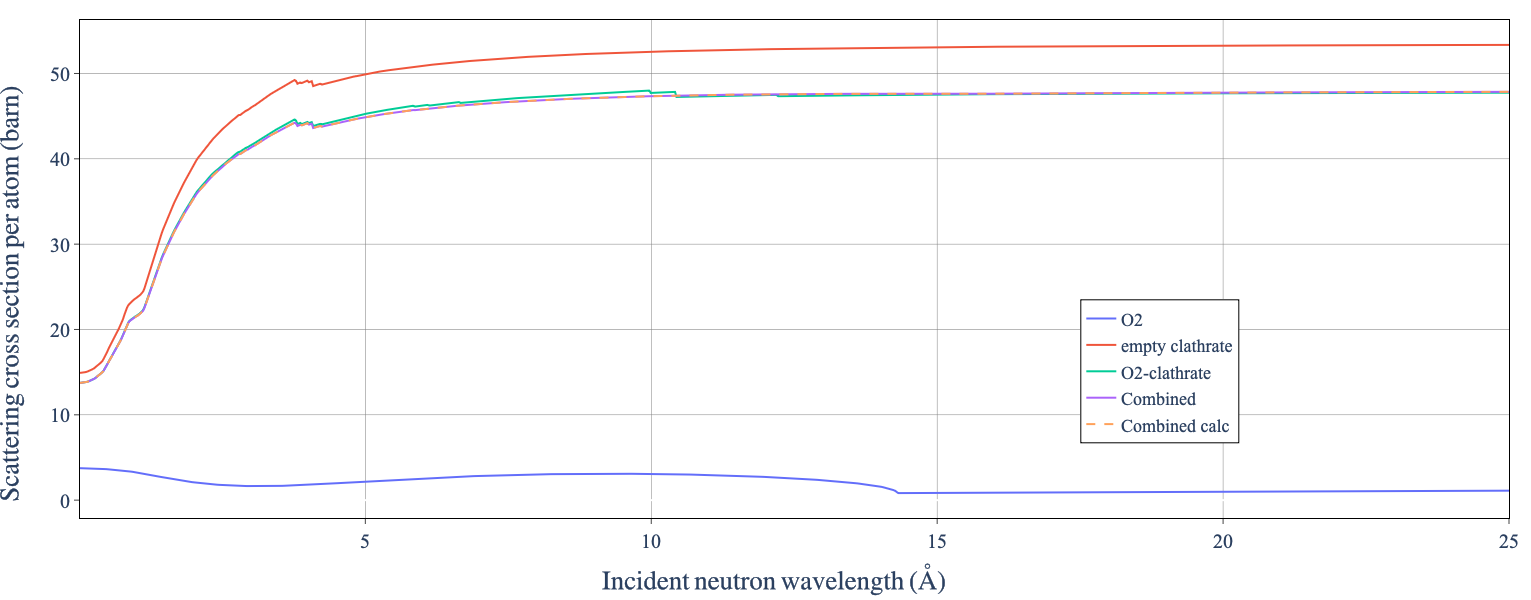

In [14]:
fig = make_subplots(rows = 1, cols = 1)
fig.add_trace(
    go.Scatter(
        x = wavelength,
        y = xs_O2,
        mode = 'lines',
        name = 'O2',
    ),
    row = 1, col = 1
)
fig.add_trace(
    go.Scatter(
        x = wavelength,
        y = xs_ept,
        mode = 'lines',
        name = 'empty clathrate',
    ),
    row = 1, col = 1
)
fig.add_trace(
    go.Scatter(
        x = wavelength,
        y = xs_cla,
        mode = 'lines',
        name = 'O2-clathrate',
    ),
    row = 1, col = 1
)
fig.add_trace(
    go.Scatter(
        x = wavelength,
        y = xs_comb,
        mode = 'lines',
        name = 'Combined',
    ),
    row = 1, col = 1
)
fig.add_trace(
    go.Scatter(
        x = wavelength,
        y = xs_ept*(17*3)/(17*3+3*2)+xs_O2*(3*2)/(17*3+3*2),
        mode = 'lines',
        line_dash = 'dash',
        name = 'Combined calc',
    ),
    row = 1, col = 1
)
fig.update_xaxes(tickfont = dict(size = 20), linecolor = 'black', mirror = True, 
                 ticks = 'outside', exponentformat = 'power', row = 1, col = 1, 
                 #type = 'log', 
                 #range=[0,25],
                 title = r'$\Large \textrm{Incident neutron wavelength } (\mathring{\textrm{A}})$', 
                 showgrid=True, gridwidth=.5, gridcolor='grey')
fig.update_yaxes(tickfont = dict(size = 20), linecolor = 'black', mirror = True, 
                 ticks = 'outside', exponentformat = 'power', row = 1, col = 1, 
                 #type = 'log', 
                 #range = [0,9],
                 title = r'$\Large \textrm{Scattering cross section per atom (barn)}$',
                 showgrid=True, gridwidth=.5, gridcolor='grey')
#fig.add_annotation(xref='paper',yref='paper',x=.5, y=.85, 
#                   text=r'$\Large \textrm{O2-D2O clathrates}$', showarrow=False)
#fig.add_annotation(xref='paper',yref='paper',x=.5, y=.75, 
#                   text=r'$\Large \textrm{SII structure}$', showarrow=False)
#fig.add_annotation(xref='paper',yref='paper',x=.5, y=.62, 
#                   text=r'$\Large T=2\textrm{ K}$', showarrow=False)
fig.update_layout(
    #paper_bgcolor = 'rgba(0,0,0,0)',
    plot_bgcolor = 'rgba(0,0,0,0)',
    font = dict(family = 'Times new roman', size = 24),
    legend = dict(x = 0.7, y = 0.15, bordercolor = "Black", borderwidth = 1, font = dict(size = 18)),
    margin = dict(l = 80, r = 20, t = 20, b = 60),
    autosize=False,
    width=700,
    height=600
)
fig.show()
#fig.write_image('TDF-D2O-clathrates_XS_wavelength.eps',width=700,height=500)
#fig.write_image('TDF-D2O-clathrates_XS_wavelength.png',width=700,height=500)